<a href="https://colab.research.google.com/github/PatilTruptiU/Sentiment-Analysis-Predicting-sentiment-of-COVID-19-tweets/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

# Importing model library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from  sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import  accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score
from sklearn.metrics import accuracy_score

import nltk
nltk.download('all',quiet=True)
from nltk.corpus import stopwords
import string 
import re
from wordcloud import WordCloud


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# upload the dataset
dataframe = pd.read_csv('/content/drive/MyDrive/almabetter/projects/3.ML Supervised classification /Coronavirus Tweets.csv',encoding='latin-1')

## Explore the data :

In [4]:
dataframe.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
#Dimension of dataset
dataframe.shape

(41157, 6)

here for analysis we does not need username and ScreenName so we drop it  

In [4]:
dataframe.drop(columns=['UserName', 'ScreenName'],axis=1,inplace=True)

In [5]:
#basic statistic info of dataset
dataframe.describe()

,Location,TweetAt,OriginalTweet,Sentiment
count,32567,41157,41157,41157
unique,12220,30,41157,5
top,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,540,3448,1,11422


In [9]:
#summary of dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       32567 non-null  object
 1   TweetAt        41157 non-null  object
 2   OriginalTweet  41157 non-null  object
 3   Sentiment      41157 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [10]:
dataframe.columns

Index(['Location', 'TweetAt', 'OriginalTweet', 'Sentiment'], dtype='object')

## Data cleaning

In [6]:
#for Tweet at column
# dates at which tweet is done 
dataframe['TweetAt'].unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

here we have to extract day month and year

In [5]:
# function to change the string format to date

from datetime import datetime

def change_to_timestamp(column):
  return datetime.strptime(column,'%d-%m-%Y')

#applying the above function to 'TweetAt' column

dataframe['TweetAt'] = dataframe['TweetAt'].apply(change_to_timestamp)

In [6]:
#getting the day, month from 'TweetAt' column

dataframe['Tweetday'] = dataframe['TweetAt'].apply(lambda x : x.day)
dataframe['TweetMonth'] = dataframe['TweetAt'].apply(lambda x : x.month)


In [9]:
dataframe['TweetMonth'].unique()

array([3, 4])

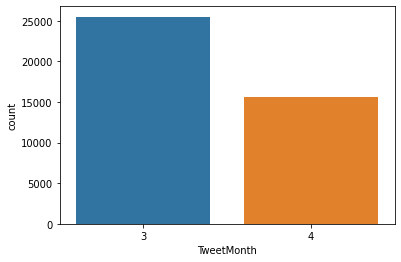

In [15]:
sns.countplot(x=dataframe['TweetMonth'])

from this we say tweet data is of two months only march and april 
maximum tweet is done in march month as compair to April

In [16]:
#now finding tweetdays per month and their count

In [7]:
dataframe['TweetMonth'] = dataframe['TweetAt'].apply(lambda x : x.day)

In [18]:
dataframe['Tweetday'].unique()

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [19]:
list_month_3 = []
list_month_4 = []
for i in range(len(dataframe['TweetAt'])):
  if dataframe['TweetAt'][i].month == 3:
    list_month_3.append(dataframe['TweetAt'][i].day)
  if dataframe['TweetAt'][i].month == 4:
    list_month_4.append(dataframe['TweetAt'][i].day) 

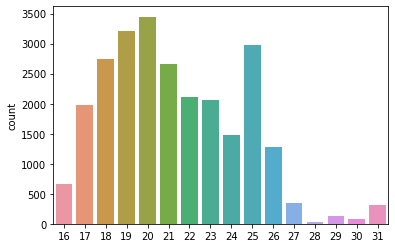

In [20]:
sns.countplot(x=list_month_3)

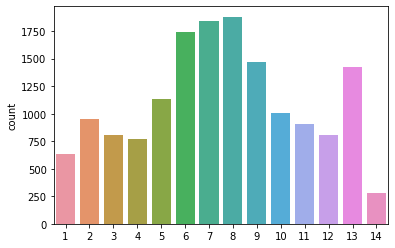

In [21]:
sns.countplot(x=list_month_4)


In [10]:
#unique value in sentiment columns
dataframe['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

here we can say that our data is divided into five type of sentiments

In [8]:
count=dataframe['Sentiment'].value_counts().reset_index()
count.columns=['Sentiment','count']
count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

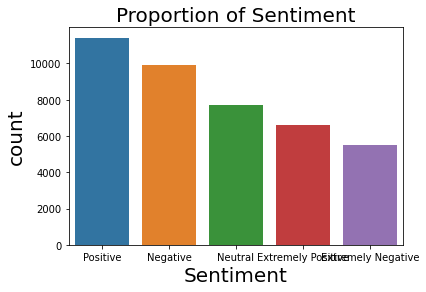

In [24]:
ax = sns.barplot(x="Sentiment", y='count', data=count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

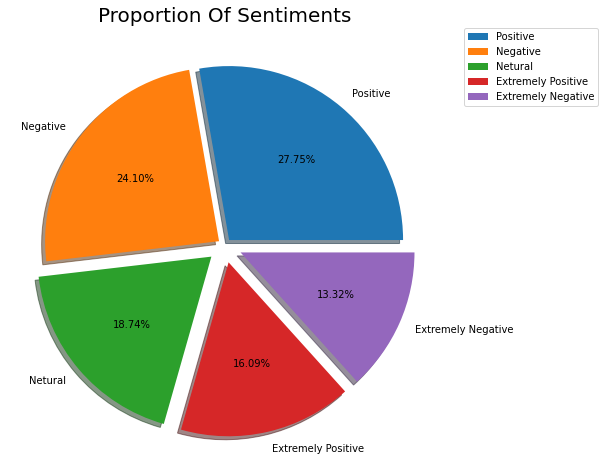

In [25]:
# Plotting the piechart for Sentiments distribution
sentiment_count = dataframe['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural','Extremely Positive','Extremely Negative']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count,explode=[0.04,0.04,0.1,0.1,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### For EDA alternatively we can use sweetviz automatic visualization tool

In [26]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import sweetviz
x= dataframe.drop(['Sentiment'], axis=1)
y= dataframe['Sentiment']

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



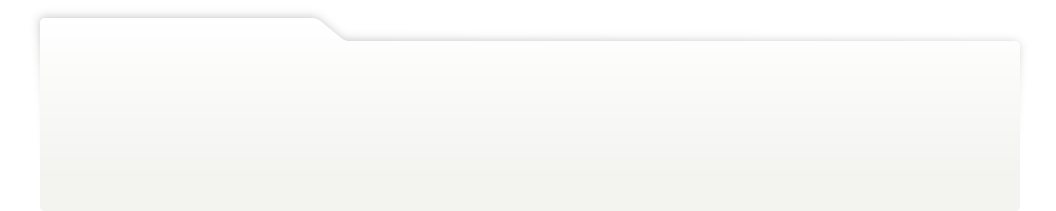
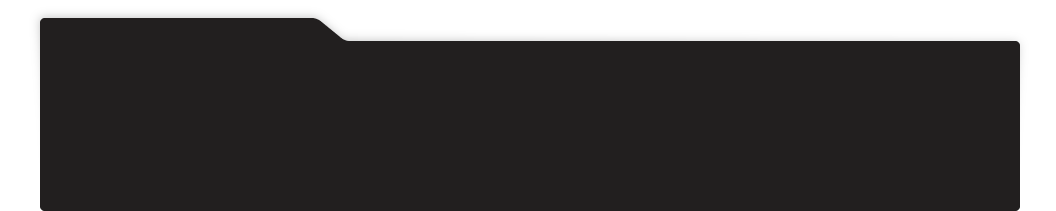
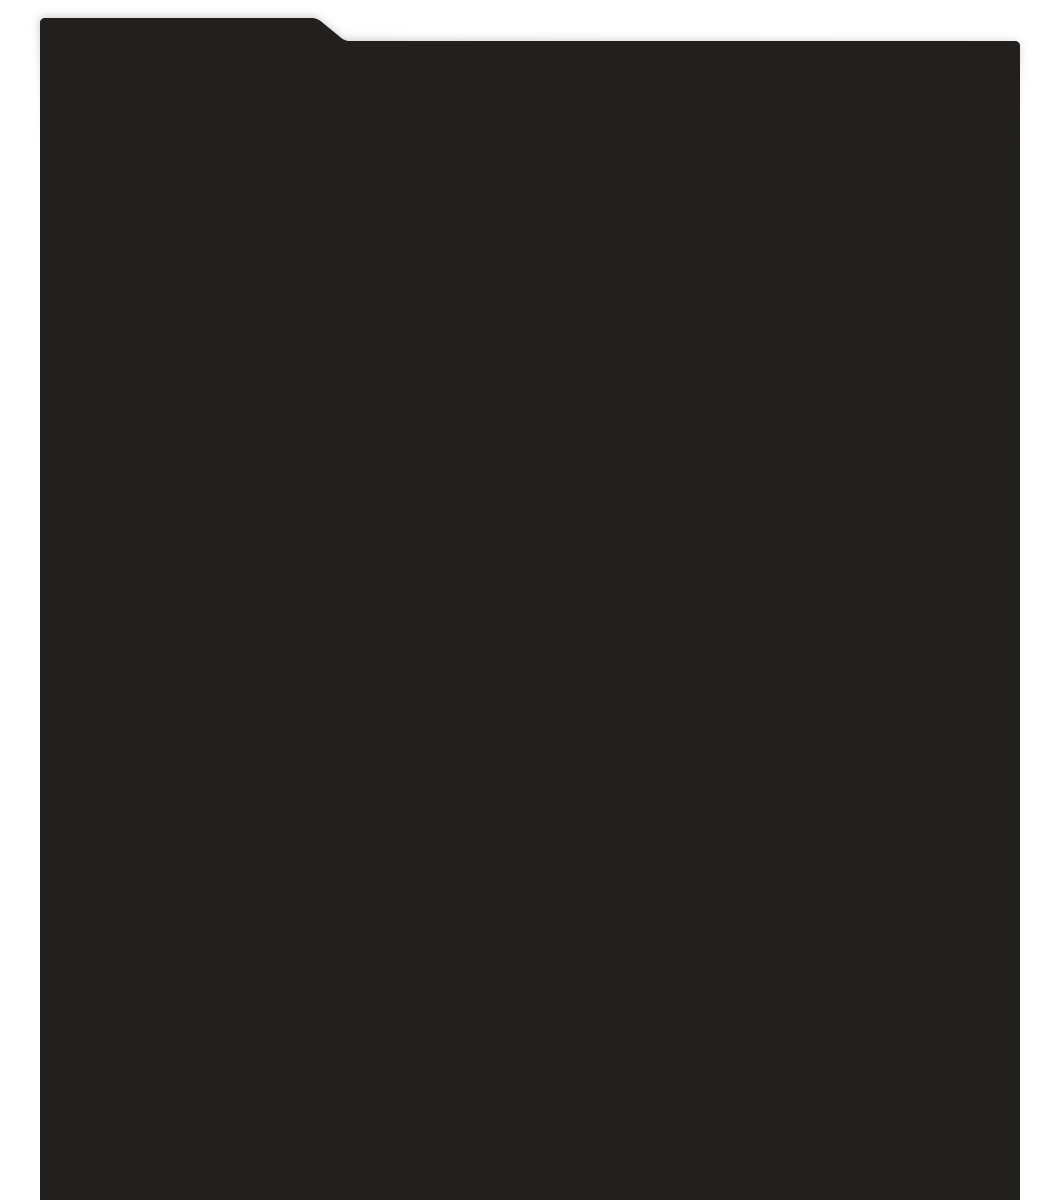
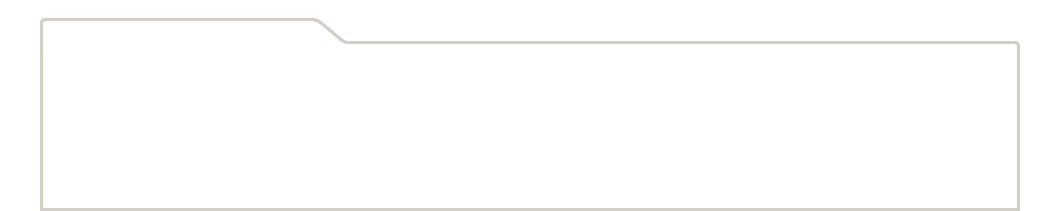
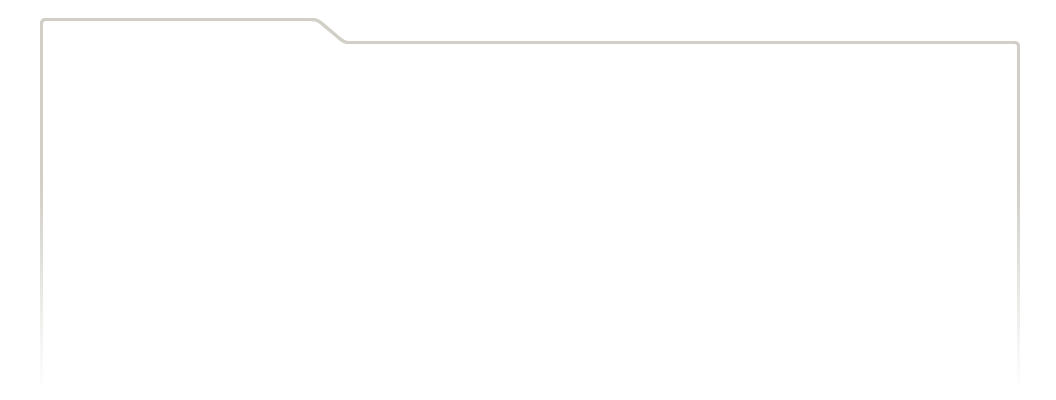
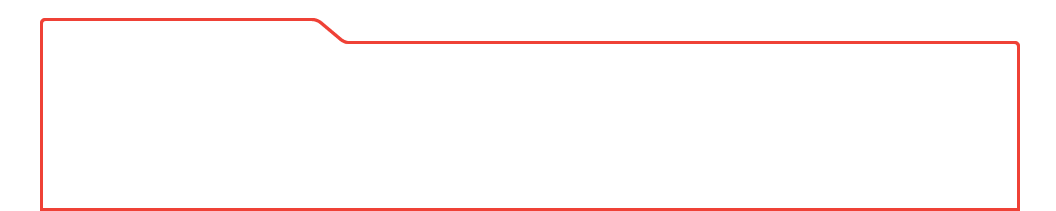
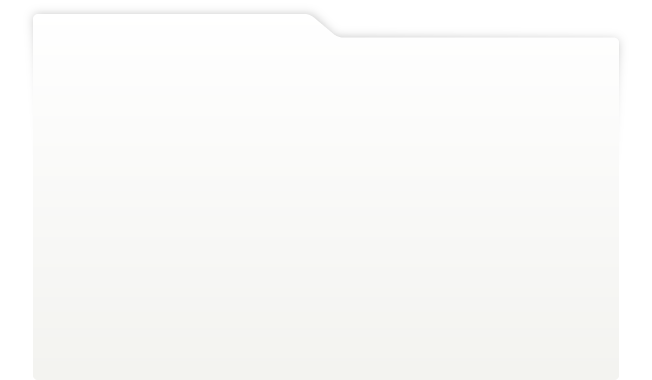
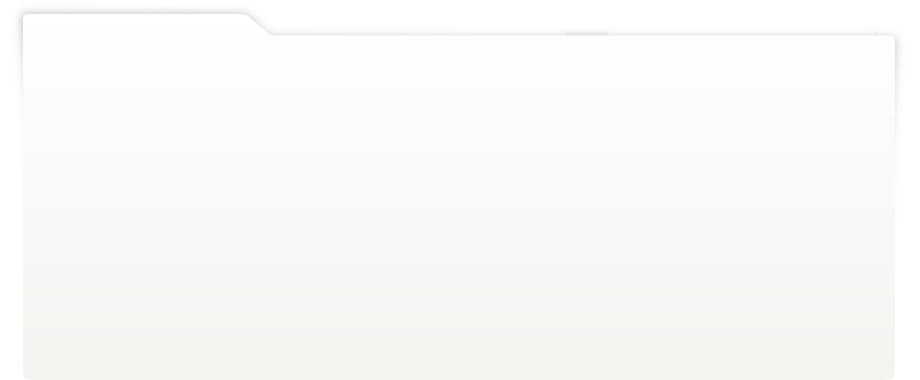
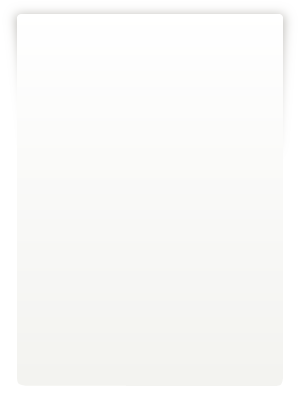
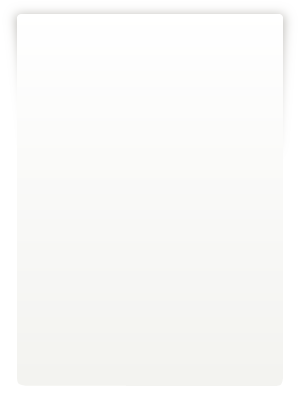
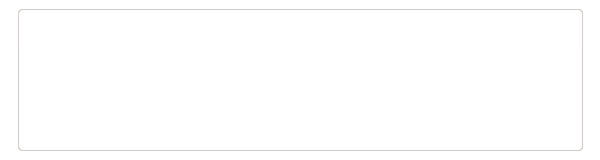
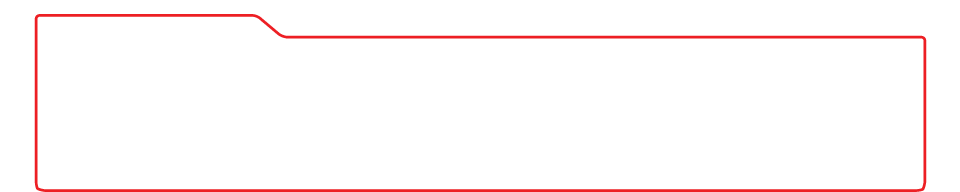
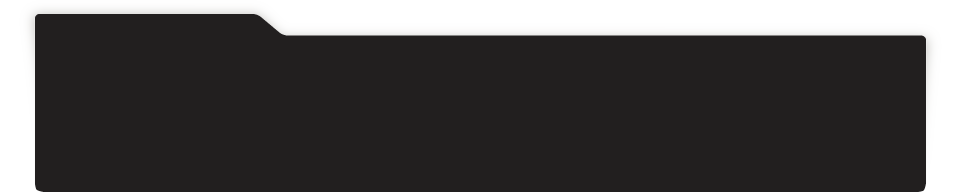
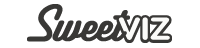
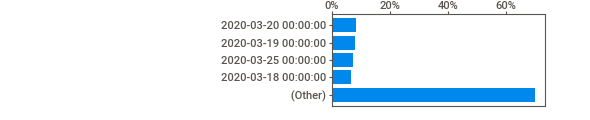
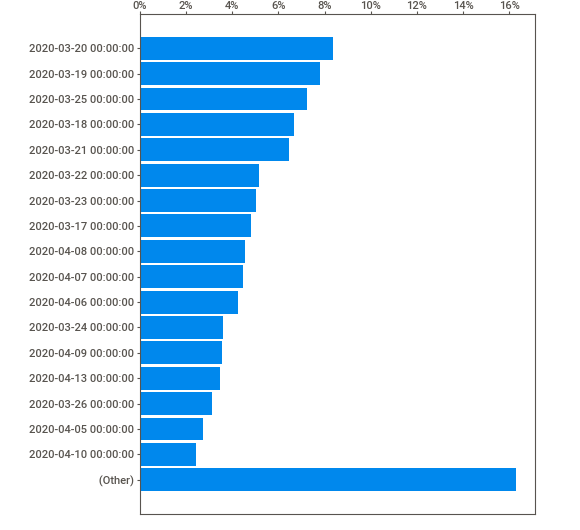
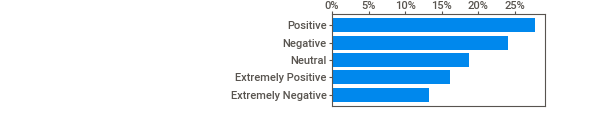
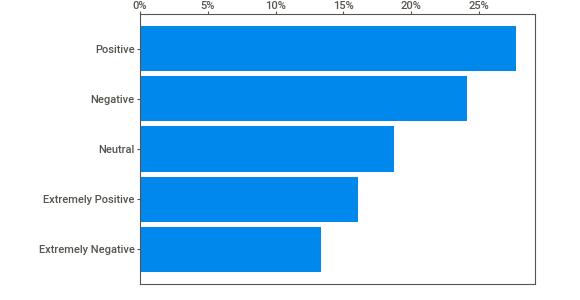
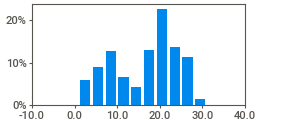
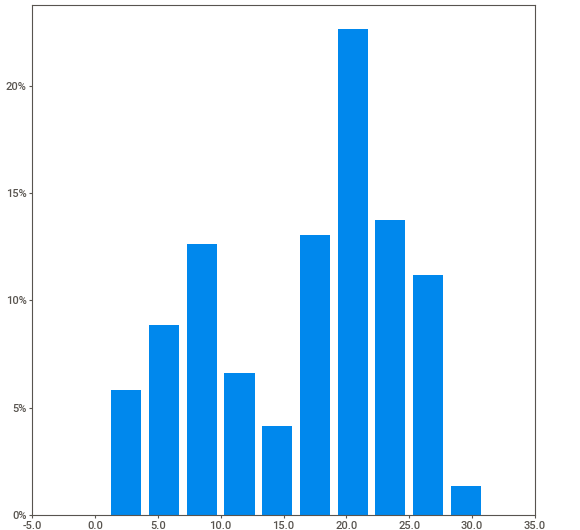
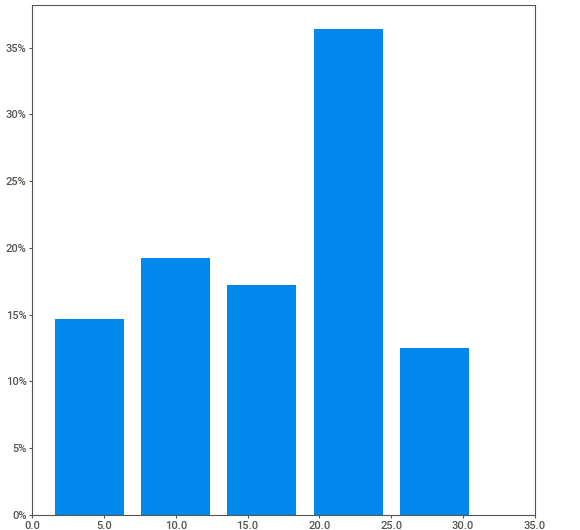
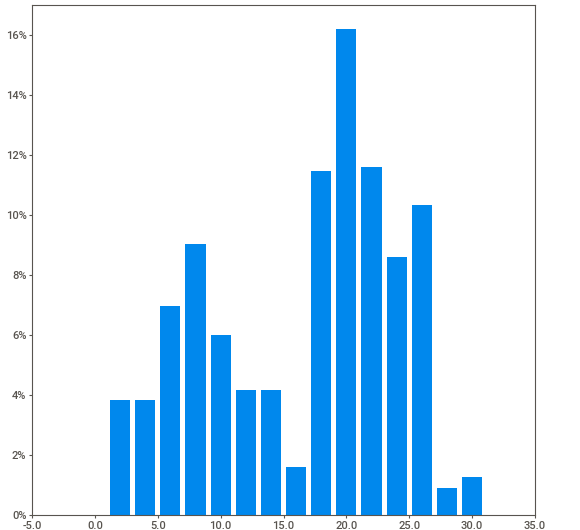
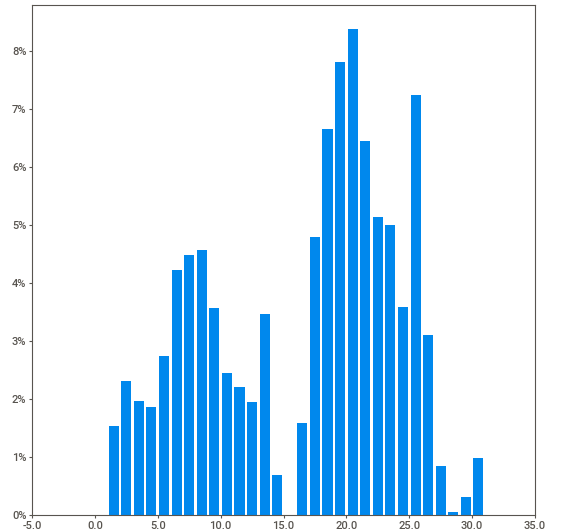
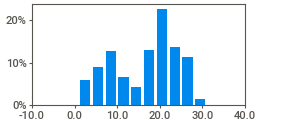
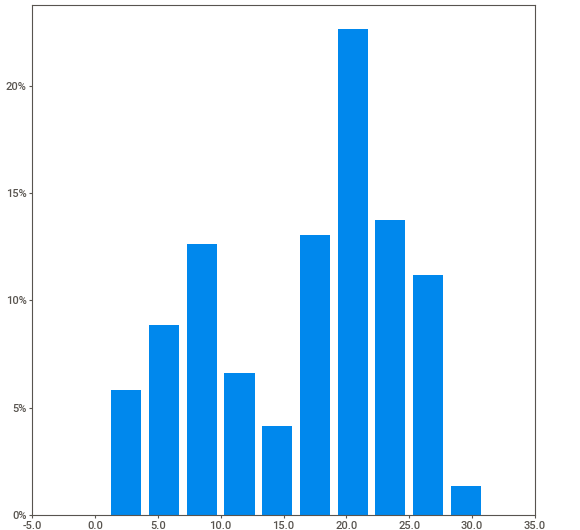
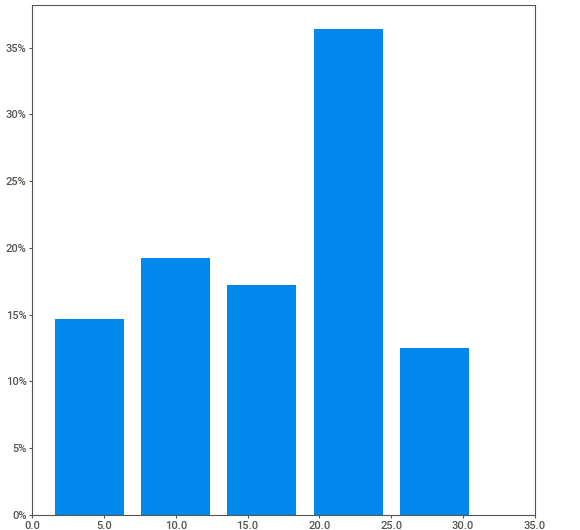
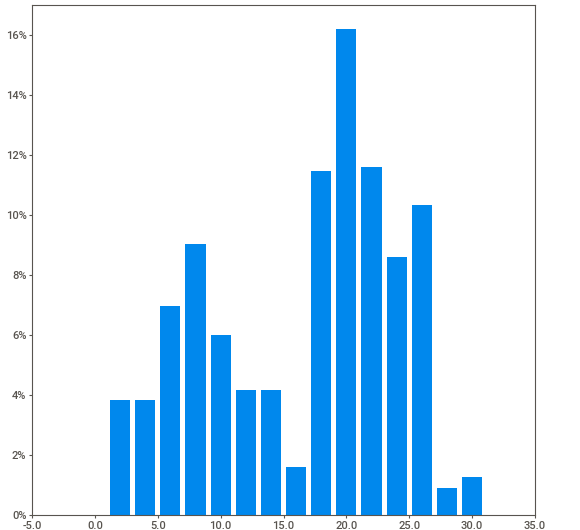
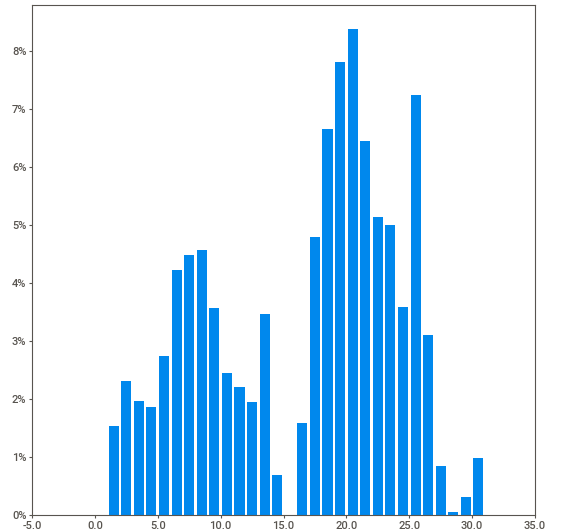
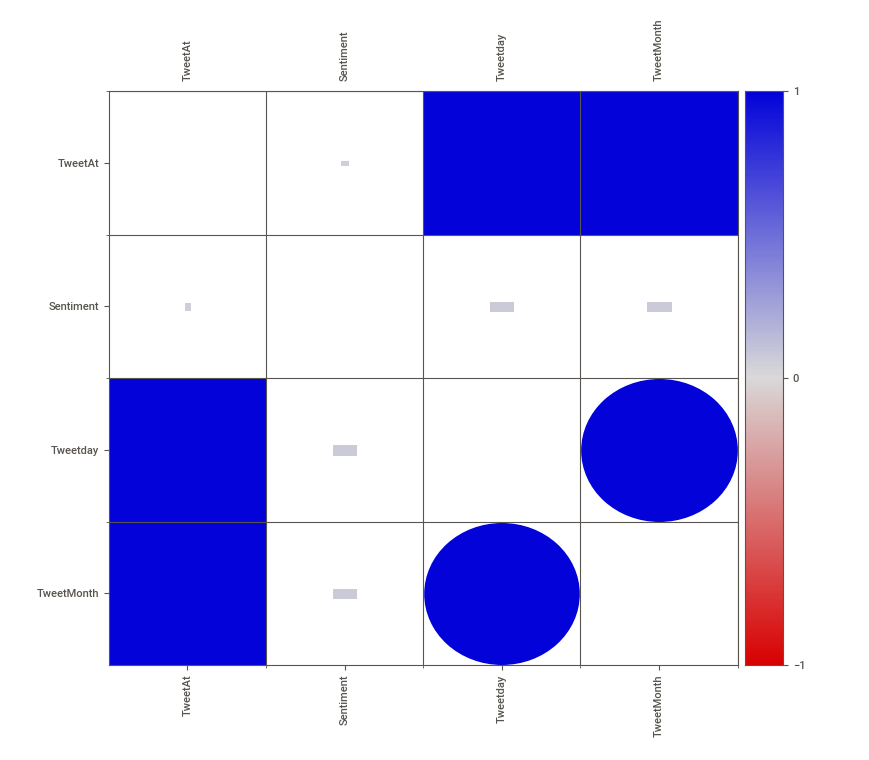
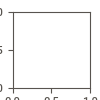

In [28]:
#creating a EDA report
import sweetviz as sv
analyze_report = sv.analyze(dataframe)
analyze_report.show_html('analyze.html', open_browser=False)
import IPython
IPython.display.HTML('analyze.html')

### **text preprocessing**

In [29]:
# now for further sentiment analysis we consider noly two featureas i.e. 'OriginalTweet'and 'Sentiment'

In [5]:
df= dataframe[['OriginalTweet','Sentiment']]

In [13]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
#checking the count of the dependent variable
count=dataframe['Sentiment'].value_counts().reset_index()
count.columns=['Sentiment','count']
count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


In [11]:
df['OriginalTweet'][12],df['OriginalTweet'][440]

('#horningsea is a caring community. LetÂ\x92s ALL look after the less capable in our village and ensure they stay healthy. Bringing shopping to their doors, help with online shopping and self isolation if you have symptoms or been exposed to somebody who has. https://t.co/lsGrXXhjhh',
 'Off to play supermarket bingo....will I get everything I need? Probably not..#covid?19uk #headache #COVID2019')

In [12]:
#convert to lower case
df['OriginalTweet']=df['OriginalTweet'].apply(lambda x:x.lower())
df['OriginalTweet'].sample(5)

15594    this is great! beer company anheuser-busch is ...
31646    here s how cbs star and her team at blinking o...
39069    woke up early to make the line at the supermar...
23829    unless you are living under a rock or have alr...
35754    sports behaving badly? a us nielsen sports sur...
Name: OriginalTweet, dtype: object

In [7]:
#Punctuation Removal

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punctuation(tweet):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return tweet.translate(translator)

In [10]:
#apply the function to column
df['OriginalTweet']=df['OriginalTweet'].apply(remove_punctuation)
df.head(10)

,OriginalTweet,Sentiment
0,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia Woolworths to give elder...,Positive
3,My food stock is not the only one which is emp...,Positive
4,Me ready to go at supermarket during the COVID...,Extremely Negative
5,As news of the regionÂs first confirmed COVID...,Positive
6,Cashier at grocery store was sharing his insig...,Positive
7,Was at the supermarket today Didnt buy toilet ...,Neutral
8,Due to COVID19 our retail store and classroom ...,Positive
9,For corona preventionwe should stop to buy thi...,Negative


In [11]:
#remove URLs
import re
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

In [12]:
#apply the remove_URL function to column
df['OriginalTweet']=df['OriginalTweet'].apply(remove_URL)
df['OriginalTweet'][0]

'MeNyrbie PhilGahan Chrisitv  and  and '

### **Removing stopwords**

Extract the stop words

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [15]:
# function to remove stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words(by using list comprehension)
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [16]:
df['stopward_removal_Tweet']=df['OriginalTweet'].apply(stopwords)

In [17]:
df.sample(5)

,OriginalTweet,Sentiment,stopward_removal_Tweet
38162,Consumer spending is falling due to Coronaviru...,Negative,consumer spending falling due coronavirus 2 ca...
15046,Even in a dark time there s always a glimmer o...,Extremely Positive,even dark time always glimmer hope one powhata...
32625,retiredrebel I go inside as my local Farmboy a...,Negative,retiredrebel go inside local farmboy grocery s...
6182,ohtobekay Hi there we strongly condemn price g...,Negative,ohtobekay hi strongly condemn price gouging po...
2805,Herald has stepped up its supply of foil trays...,Positive,herald stepped supply foil trays lids bagasse ...


In [18]:
tokenized_tweet = df['stopward_removal_Tweet'].apply(lambda x: x.split())

In [19]:
tokenized_tweet.sample(3)

8064     [âthe, rouble, gone, tailspinâ, declares, on...
1130     [outbreak, undermines, consumer, spending, sma...
40145    [gta, house, prices, still, steady, 3, 5, week...
Name: stopward_removal_Tweet, dtype: object

###**stemming** 

It is also known as the text standardization step where the words are stemmed or diminished to their root/base form.

In [20]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
df['clean_tweet'] = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [21]:
for i in range(len(df['clean_tweet'])):
    df['clean_tweet'][i] = ' '.join(df['clean_tweet'][i])

In [22]:
df.head()

,OriginalTweet,Sentiment,stopward_removal_Tweet,clean_tweet
0,MeNyrbie PhilGahan Chrisitv and and,Neutral,menyrbie philgahan chrisitv,menyrbi philgahan chrisitv
1,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia Woolworths to give elder...,Positive,coronavirus australia woolworths give elderly ...,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...,food stock one empti pleas dont panic enough f...
4,Me ready to go at supermarket during the COVID...,Extremely Negative,ready go supermarket covid19 outbreak im paran...,readi go supermarket covid19 outbreak im paran...


###**wordcloud of tweet and sentiments**

In [23]:
from wordcloud import WordCloud

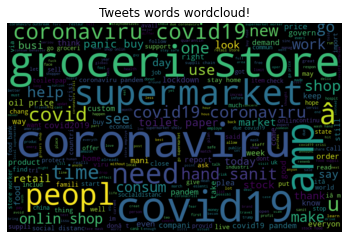

In [24]:
# creating wordcloud for various terms in tweet
all_words = ' '.join(text for text in df['clean_tweet'])
all_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(all_words)

plt.title('Tweets words wordcloud!')
plt.imshow(all_words_cloud, interpolation="bilinear")
plt.axis('off');

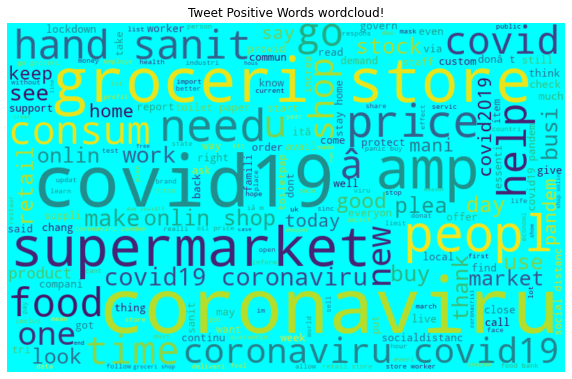

In [25]:
#creating wordcloud for positive sentiments
Positive_words =' '.join([text for text in df['clean_tweet'][df['Sentiment']=='Positive']])
#positive_words = ' '.join(text for text in data[data['Sentiment']=='Positive']['clean_tweet'])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(Positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Tweet Positive Words wordcloud!')
plt.show()


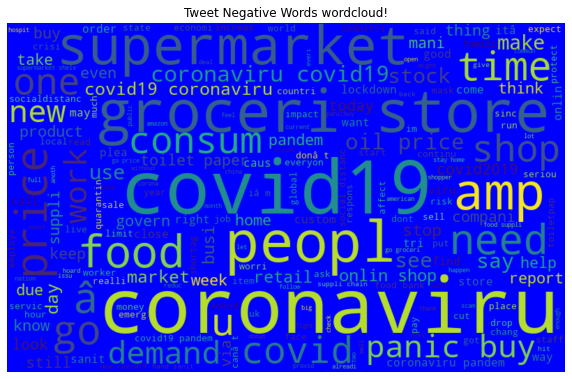

In [26]:
#creating wordcloud for negative sentiments
Negative_words =' '.join([text for text in df['clean_tweet'][df['Sentiment']=='Negative']])

wordcloud = WordCloud(background_color = 'blue', width=800, height=500, random_state = 0, max_font_size = 110).generate(Negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Tweet Negative Words wordcloud!')
plt.show()


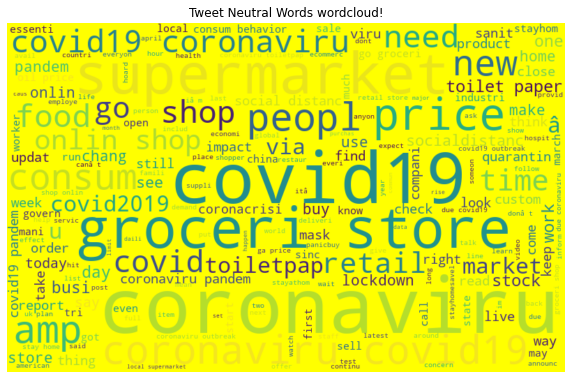

In [27]:
#creating wordcloud for Neutral sentiments
Neutral_words =' '.join([text for text in df['clean_tweet'][df['Sentiment']=='Neutral']])

wordcloud = WordCloud(background_color = 'yellow', width=800, height=500, random_state = 0, max_font_size = 110).generate(Neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Tweet Neutral Words wordcloud!')
plt.show()


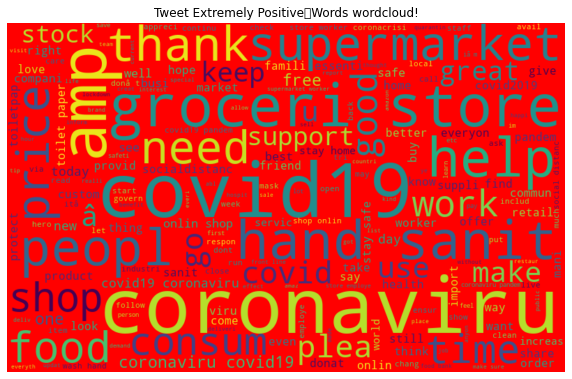

In [28]:
#creating wordcloud for Neutral sentiments
Extremely_Positive_words =' '.join([text for text in df['clean_tweet'][df['Sentiment']=='Extremely Positive']])

wordcloud = WordCloud(background_color = 'red', width=800, height=500, random_state = 0, max_font_size = 110).generate(Extremely_Positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Tweet Extremely Positive	Words wordcloud!')
plt.show()

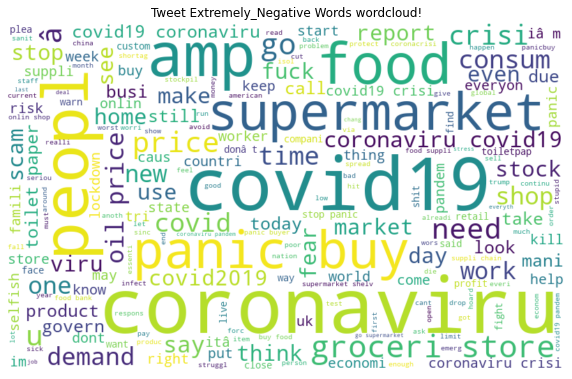

In [29]:
#creating wordcloud for Neutral sentiments
Extremely_Negative_words =' '.join([text for text in df['clean_tweet'][df['Sentiment']=='Extremely Negative']])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(Extremely_Negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Tweet Extremely_Negative Words wordcloud!')
plt.show()

###**model fitting : train_test split**

In [30]:
df.head()

,OriginalTweet,Sentiment,stopward_removal_Tweet,clean_tweet
0,MeNyrbie PhilGahan Chrisitv and and,Neutral,menyrbie philgahan chrisitv,menyrbi philgahan chrisitv
1,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia Woolworths to give elder...,Positive,coronavirus australia woolworths give elderly ...,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...,food stock one empti pleas dont panic enough f...
4,Me ready to go at supermarket during the COVID...,Extremely Negative,ready go supermarket covid19 outbreak im paran...,readi go supermarket covid19 outbreak im paran...


In [31]:
X = df['clean_tweet']
y = df['Sentiment']

In [32]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = data.Sentiment.values)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [34]:
from matplotlib.axis import XAxis
# create a count vectorizer object
# creating bag of words
count_vectorizer = CountVectorizer(max_features = 2500)
# fit the count vectorizer using the text data
count_vectorizer.fit_transform(df['clean_tweet']).toarray()
# extract the tfid representation matrix of the text data
tfid_matrix = count_vectorizer.transform(df['clean_tweet'])#it create the sparse matrix
# collect the tfid matrix in numpy array
X= tfid_matrix.todense()
y = df['Sentiment']

In [35]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)